In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt


In [3]:
import os
os.environ["OMP_NUM_THREADS"] = "1"
os.environ["OPENBLAS_NUM_THREADS"] = "1"
os.environ["MKL_NUM_THREADS"] = "1"
os.environ["VECLIB_MAXIMUM_THREADS"] = "1"
os.environ["NUMEXPR_NUM_THREADS"] = "1"

import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

In [3]:

# Load the dataset
df = pd.read_csv('classification_data_set_post_1979.csv')

# Set the 'DATE' column as the index
df['DATE'] = pd.to_datetime(df['DATE'])
df.set_index('DATE', inplace=True)

# Prepare both standardized and non-standardized data
scaler = StandardScaler()
standardized_features = scaler.fit_transform(df)
non_standardized_features = df.values



Analysis for Standardized Data


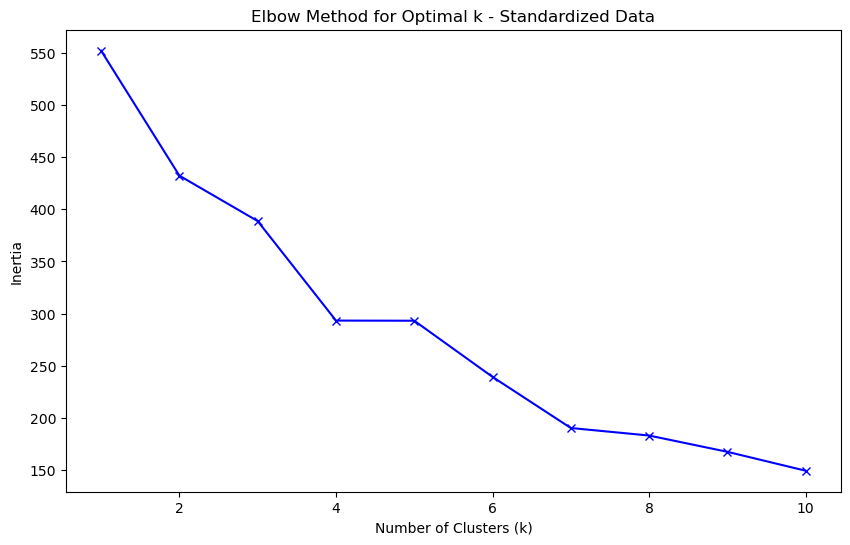

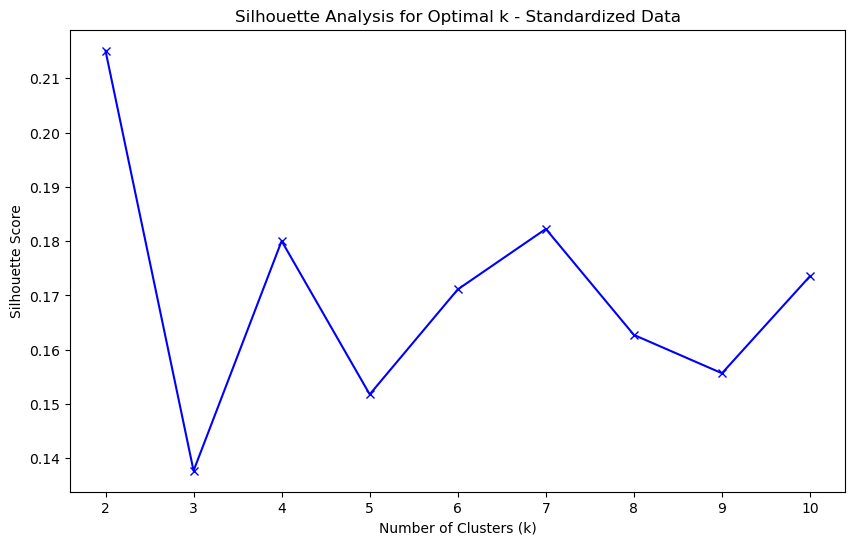

Enter the optimal number of clusters for Standardized Data:  4


Cluster Centroids - Standardized Data:
   PPI_pct_change  Real_GDP_pct_change  Industrial_production_pct_change  \
0        0.272624             0.383356                          0.526119   
1        0.012852             0.192973                          0.025644   
2        1.015933             0.087725                          0.021892   
3       -1.124061            -0.338830                         -1.243345   

   Consumer_sentiment_diff  Unemployment_rate_diff   CPI_log  
0                 0.788095               -0.080357 -1.422407  
1                 0.119697               -0.001894 -1.383384  
2                -1.470196                0.020588 -0.493320  
3                -1.688889                0.555556 -1.752190  




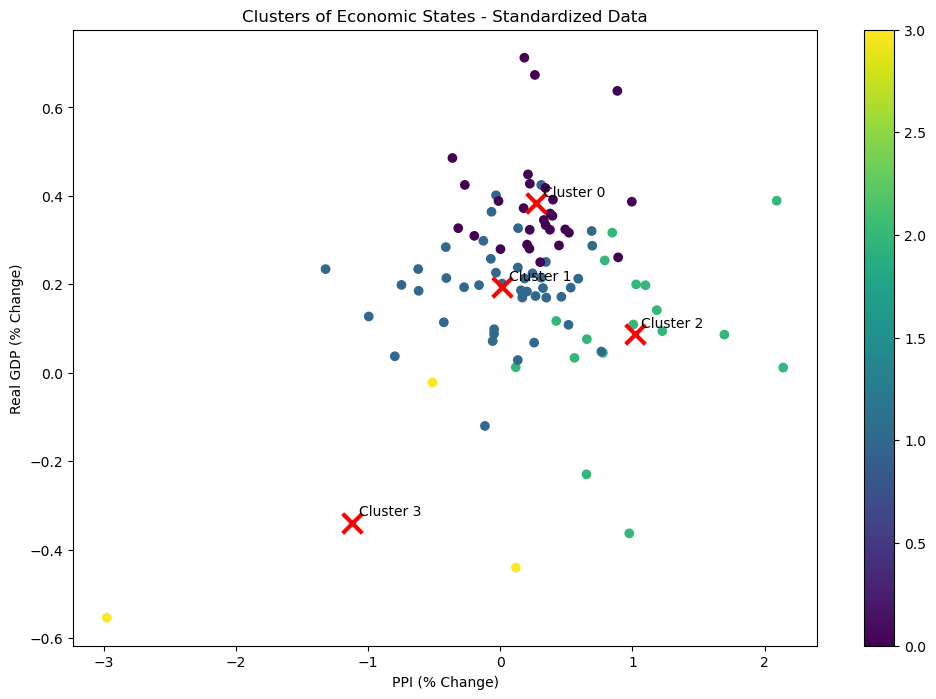

Clustered data saved to 'clustered_economic_data_standardized_data.csv'

Analysis for Non-Standardized Data


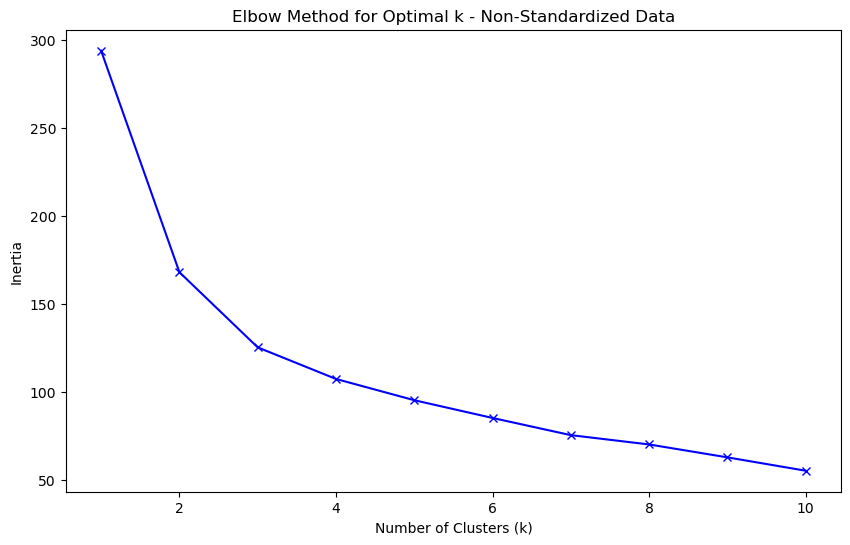

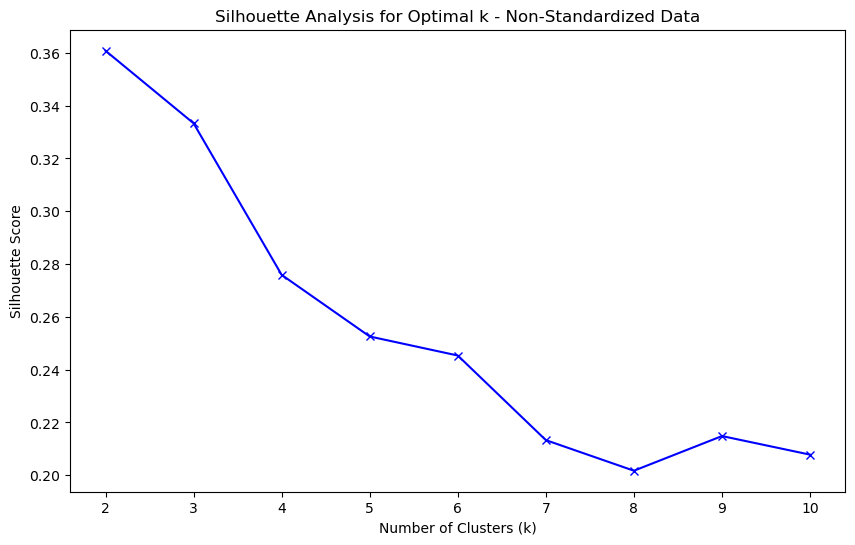

Enter the optimal number of clusters for Non-Standardized Data:  4


Cluster Centroids - Non-Standardized Data:
   PPI_pct_change  Real_GDP_pct_change  Industrial_production_pct_change  \
0       -0.021197             0.176324                          0.049745   
1        0.437736             0.293002                          0.284290   
2        0.794556             0.067681                         -0.069863   
3       -0.240785             0.311818                          0.272334   

   Consumer_sentiment_diff  Unemployment_rate_diff   CPI_log  
0                -0.562857                0.003810 -1.334324  
1                 0.816129               -0.037634 -1.279561  
2                -2.284000                0.095556 -0.897150  
3                 2.357576               -0.065152 -1.319486  




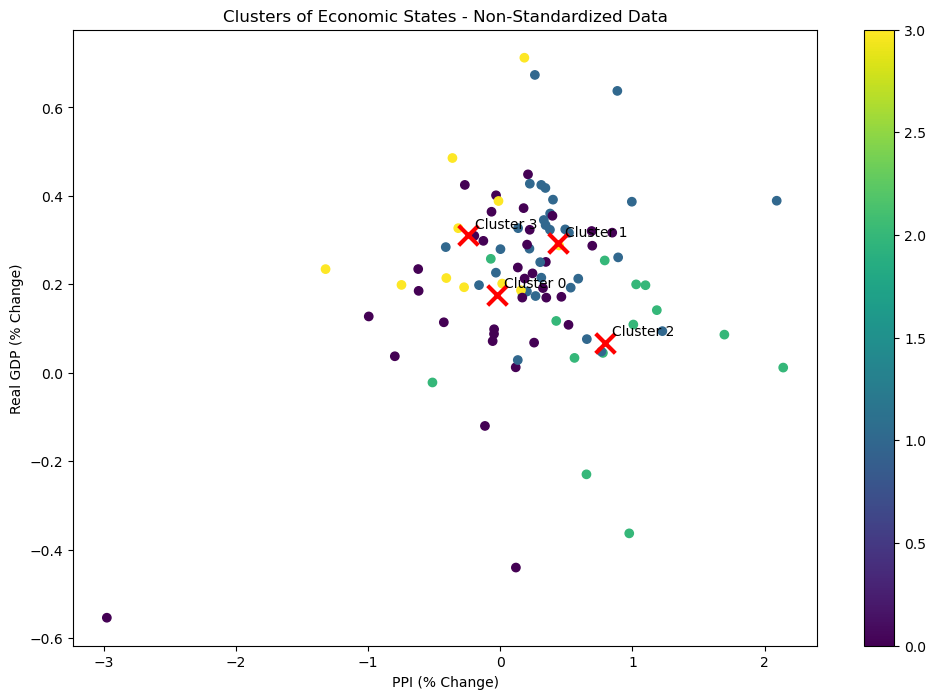

Clustered data saved to 'clustered_economic_data_non-standardized_data.csv'

Analysis complete. Please check the generated plots and CSV files.


In [4]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Assuming you've already loaded and preprocessed your data as shown

def kmeans_manual(X, n_clusters, max_iters=100, random_state=42):
    np.random.seed(random_state)
    centroids = X[np.random.choice(X.shape[0], n_clusters, replace=False)]
    
    for _ in range(max_iters):
        # Assign points to nearest centroid
        distances = np.sqrt(((X - centroids[:, np.newaxis])**2).sum(axis=2))
        labels = np.argmin(distances, axis=0)
        
        # Update centroids
        new_centroids = np.array([X[labels == k].mean(axis=0) for k in range(n_clusters)])
        
        # Check for convergence
        if np.all(centroids == new_centroids):
            break
        
        centroids = new_centroids
    
    # Calculate inertia
    inertia = np.sum((X - centroids[labels])**2)
    
    return labels, centroids, inertia

def plot_elbow_curve(data, title):
    inertias = []
    k_range = range(1, 11)
    for k in k_range:
        _, _, inertia = kmeans_manual(data, k)
        inertias.append(inertia)
    
    plt.figure(figsize=(10, 6))
    plt.plot(k_range, inertias, 'bx-')
    plt.xlabel('Number of Clusters (k)')
    plt.ylabel('Inertia')
    plt.title(f'Elbow Method for Optimal k - {title}')
    plt.show()

def calculate_silhouette_scores(data, title):
    silhouette_scores = []
    k_range = range(2, 11)
    for k in k_range:
        labels, _, _ = kmeans_manual(data, k)
        score = silhouette_score(data, labels)
        silhouette_scores.append(score)
    
    plt.figure(figsize=(10, 6))
    plt.plot(k_range, silhouette_scores, 'bx-')
    plt.xlabel('Number of Clusters (k)')
    plt.ylabel('Silhouette Score')
    plt.title(f'Silhouette Analysis for Optimal k - {title}')
    plt.show()

def perform_clustering(data, df, title, optimal_k):
    labels, centroids, _ = kmeans_manual(data, optimal_k)
    
    df_with_clusters = df.copy()
    df_with_clusters['Cluster'] = labels
    
    if data is standardized_features:
        centroids = scaler.inverse_transform(centroids)
    
    centroid_df = pd.DataFrame(centroids, columns=df.columns)
    print(f"Cluster Centroids - {title}:")
    print(centroid_df)
    print("\n")
    
    plt.figure(figsize=(12, 8))
    scatter = plt.scatter(df['PPI_pct_change'], df['Real_GDP_pct_change'], c=labels, cmap='viridis')
    plt.xlabel('PPI (% Change)')
    plt.ylabel('Real GDP (% Change)')
    plt.title(f'Clusters of Economic States - {title}')
    plt.colorbar(scatter)
    
    for i, centroid in enumerate(centroids):
        plt.scatter(centroid[df.columns.get_loc('PPI_pct_change')], 
                    centroid[df.columns.get_loc('Real_GDP_pct_change')], 
                    c='red', marker='x', s=200, linewidths=3)
        plt.annotate(f'Cluster {i}', (centroid[df.columns.get_loc('PPI_pct_change')], 
                                      centroid[df.columns.get_loc('Real_GDP_pct_change')]),
                     xytext=(5, 5), textcoords='offset points')
    
    plt.show()
    
    return df_with_clusters

# Analyze both standardized and non-standardized data
for data, title in [(standardized_features, "Standardized Data"), 
                    (non_standardized_features, "Non-Standardized Data")]:
    print(f"\nAnalysis for {title}")
    plot_elbow_curve(data, title)
    calculate_silhouette_scores(data, title)
    
    optimal_k = int(input(f"Enter the optimal number of clusters for {title}: "))
    
    clustered_df = perform_clustering(data, df, title, optimal_k)
    
    clustered_df.to_csv(f'clustered_economic_data_{title.lower().replace(" ", "_")}.csv')
    print(f"Clustered data saved to 'clustered_economic_data_{title.lower().replace(' ', '_')}.csv'")

print("\nAnalysis complete. Please check the generated plots and CSV files.")

In [5]:
df

,PPI_pct_change,Real_GDP_pct_change,Industrial_production_pct_change,Consumer_sentiment_diff,Unemployment_rate_diff,CPI_log
DATE,,,,,,
1979-01-31,0.790351,0.253953,0.357287,-1.716667,-0.050000,-0.483261
1979-07-31,1.184527,0.141592,0.059564,-1.950000,-0.033333,0.127294
1980-01-31,1.226223,0.094103,0.078552,1.100000,0.100000,0.026845
1980-07-31,0.975820,-0.363215,-1.136191,-0.783333,0.250000,0.107403
1981-01-31,0.885733,0.637391,0.825620,1.516667,-0.050000,-0.168540
...,...,...,...,...,...,...
2022-07-31,1.695742,0.086224,0.300574,-2.616667,-0.083333,-0.251060
2023-01-31,-0.747664,0.198634,-0.046881,2.233333,-0.016667,-0.774490
2023-07-31,-0.412532,0.284166,0.053413,1.100000,0.016667,-1.089336


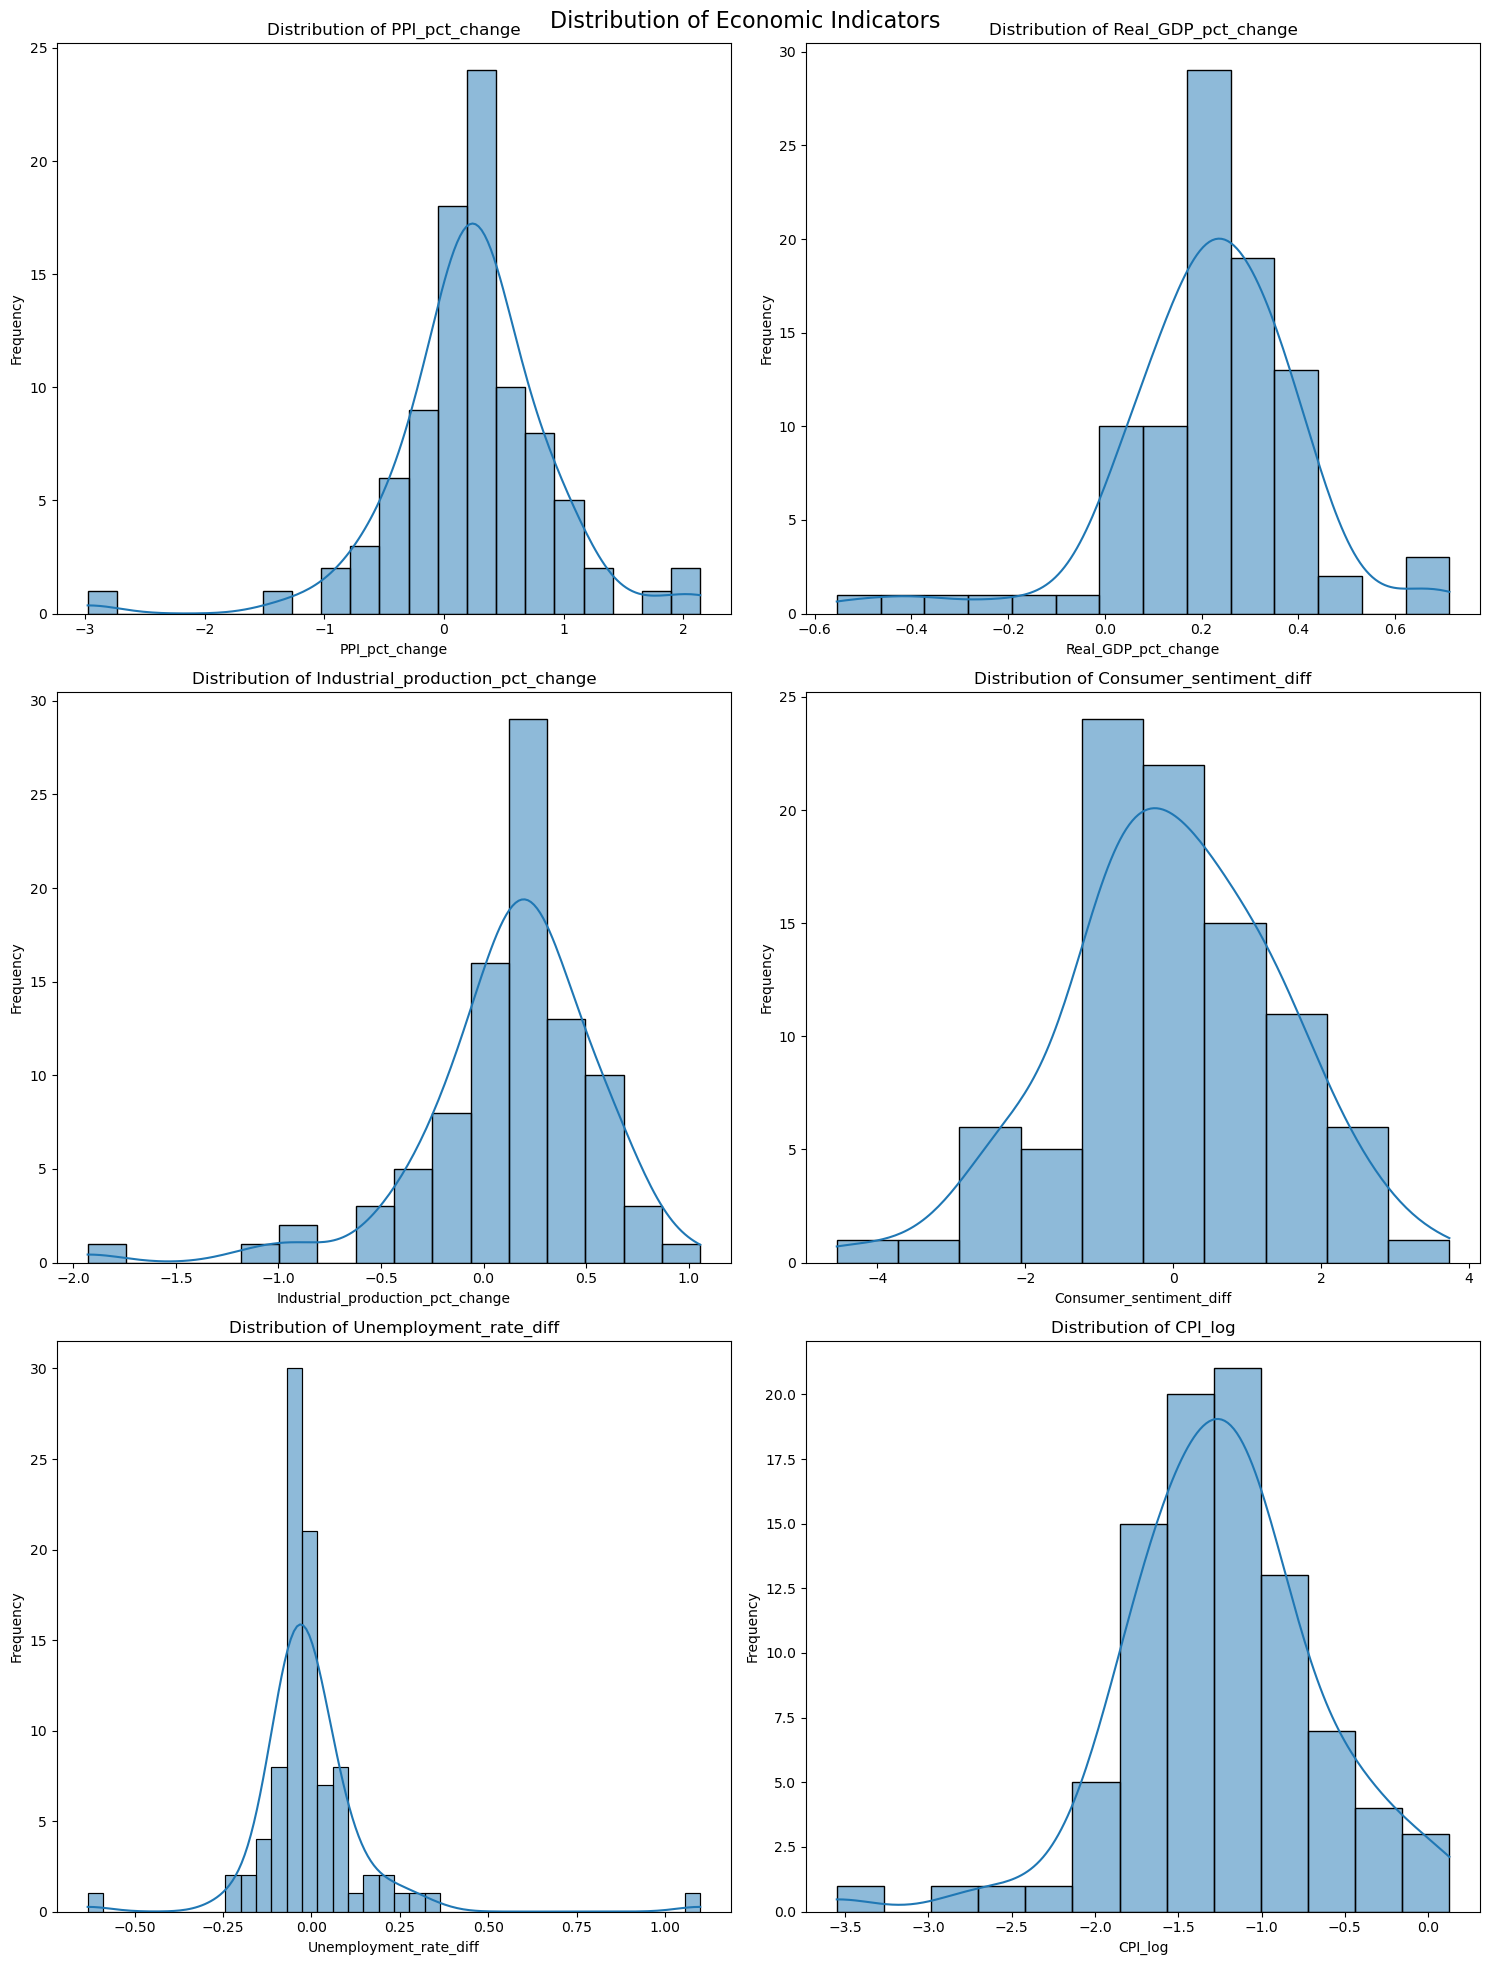

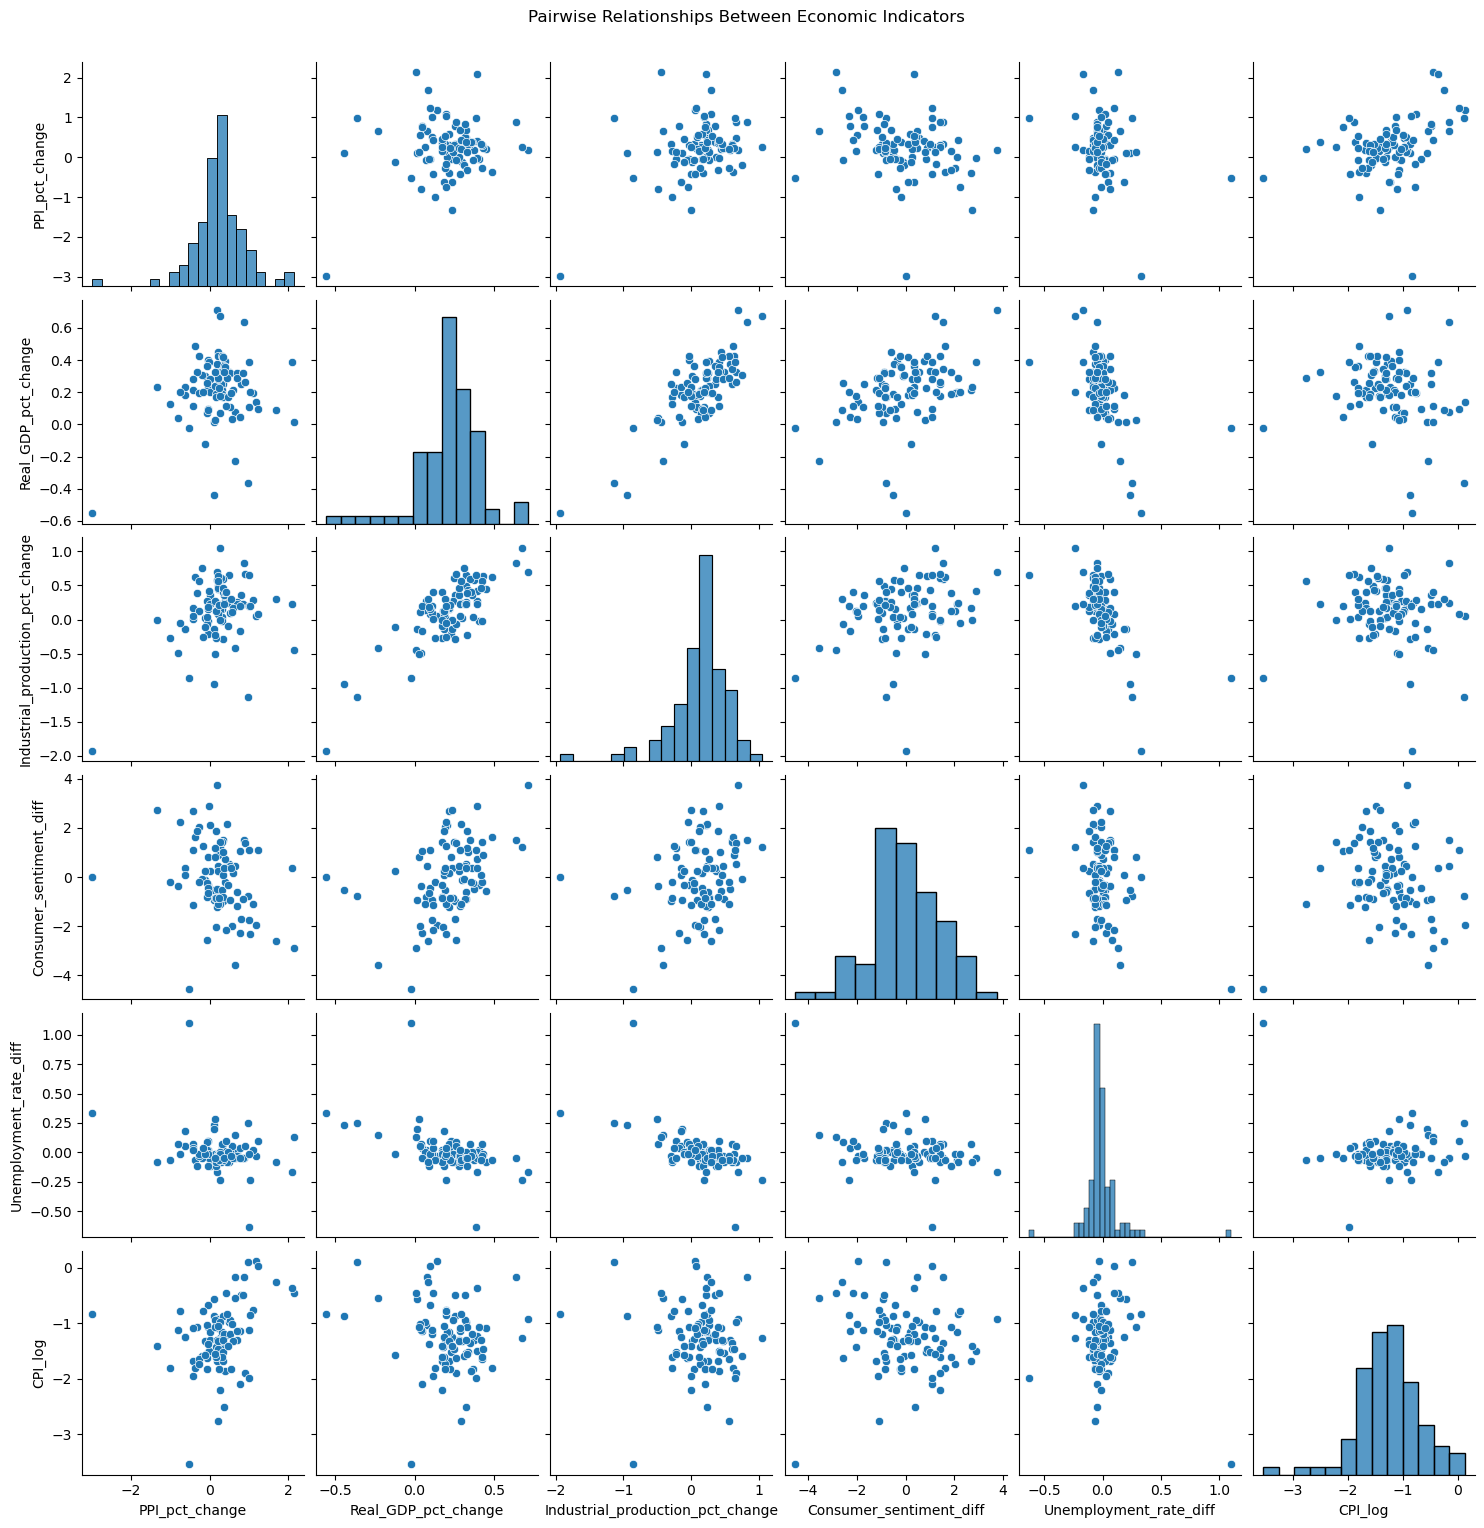

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Create subplots for each column
fig, axes = plt.subplots(3, 2, figsize=(15, 20))
fig.suptitle('Distribution of Economic Indicators', fontsize=16)

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot histograms and KDE for each column
for i, column in enumerate(df.columns):
    sns.histplot(df[column], kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

# Optional: Create a pairplot to see relationships between variables
sns.pairplot(df)
plt.suptitle('Pairwise Relationships Between Economic Indicators', y=1.02)
plt.show()

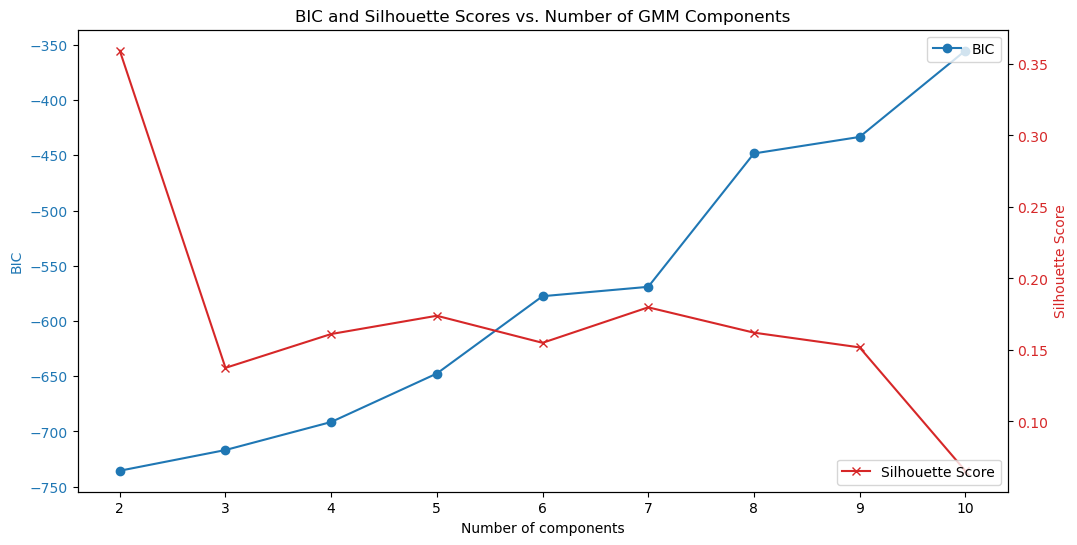

In [7]:
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('classification_data_set_post_1979.csv')
df['DATE'] = pd.to_datetime(df['DATE'])
df.set_index('DATE', inplace=True)

# Manual Min-Max normalization
def min_max_normalize(data):
    return (data - data.min()) / (data.max() - data.min())

normalized_df = df.apply(min_max_normalize)
normalized_features = normalized_df.values

def plot_bic_and_silhouette(data):
    n_components_range = range(2, 11)  # Starting from 2 to at least have more than one cluster to compare
    bic = []
    silhouette_scores = []
    
    for n_components in n_components_range:
        gmm = GaussianMixture(n_components=n_components, random_state=42, covariance_type='full')
        gmm.fit(data)
        bic.append(gmm.bic(data))
        labels = gmm.predict(data)
        silhouette_scores.append(silhouette_score(data, labels))
    
    fig, ax1 = plt.subplots(figsize=(12, 6))
    
    # Plotting BIC
    color = 'tab:blue'
    ax1.set_xlabel('Number of components')
    ax1.set_ylabel('BIC', color=color)
    ax1.plot(n_components_range, bic, color=color, marker='o', label='BIC')
    ax1.tick_params(axis='y', labelcolor=color)
    ax1.legend(loc='upper right')
    
    # Plotting Silhouette Scores
    ax2 = ax1.twinx()
    color = 'tab:red'
    ax2.set_ylabel('Silhouette Score', color=color)
    ax2.plot(n_components_range, silhouette_scores, color=color, marker='x', label='Silhouette Score')
    ax2.tick_params(axis='y', labelcolor=color)
    ax2.legend(loc='lower right')
    
    plt.title('BIC and Silhouette Scores vs. Number of GMM Components')
    plt.show()

# Perform analysis
plot_bic_and_silhouette(normalized_features)


Cluster Means:
   PPI_pct_change  Real_GDP_pct_change  Industrial_production_pct_change  \
0        0.835232             0.129327                          0.139507   
1        0.110413             0.285270                          0.252497   
2       -0.307774            -0.396866                         -1.107525   
3        0.143424             0.202717                         -0.021641   

   Consumer_sentiment_diff  Unemployment_rate_diff   CPI_log  
0                -1.230818               -0.005062 -0.629045  
1                 0.369641               -0.032509 -1.341507  
2                -1.216667                0.241667 -0.536941  
3                 0.268612                0.058976 -1.947951  


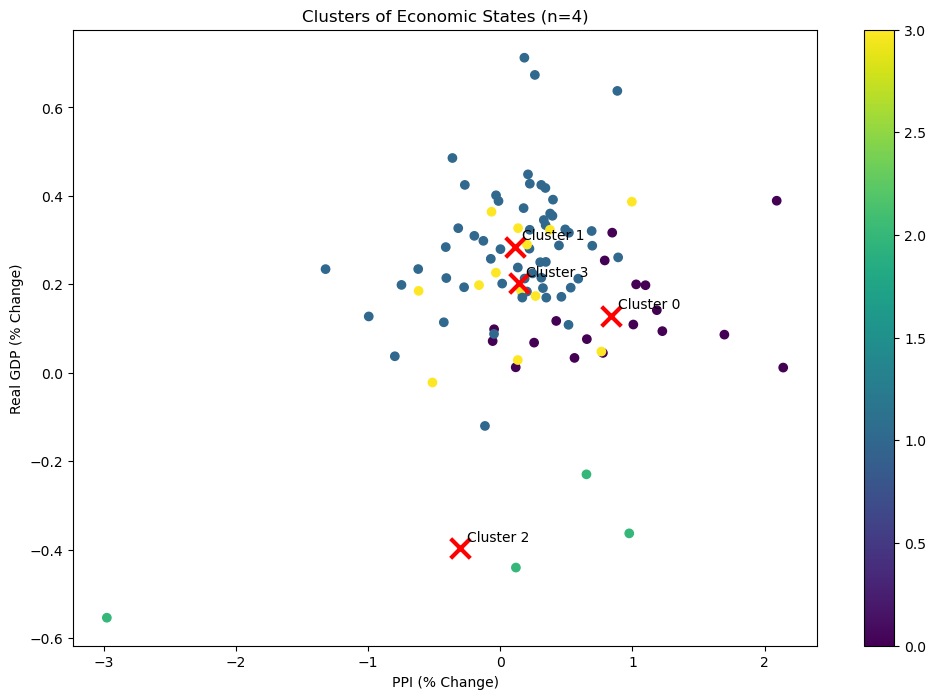

Clustered data saved to 'clustered_economic_data_gmm_4_clusters.csv'


In [8]:
from sklearn.mixture import GaussianMixture
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('classification_data_set_post_1979.csv')
df['DATE'] = pd.to_datetime(df['DATE'])
df.set_index('DATE', inplace=True)

# Manual Min-Max normalization
def min_max_normalize(data):
    return (data - data.min()) / (data.max() - data.min())

# Select only the original features for clustering
original_columns = ['PPI_pct_change', 'Real_GDP_pct_change', 'Industrial_production_pct_change', 
                    'Consumer_sentiment_diff', 'Unemployment_rate_diff', 'CPI_log']
normalized_df = df[original_columns].apply(min_max_normalize)
normalized_features = normalized_df.values

# Set the number of clusters
num_clusters = 4  # You can modify this based on your analysis

# Fit GMM
gmm = GaussianMixture(n_components=num_clusters, random_state=42, covariance_type='full')
gmm.fit(normalized_features)

# Get cluster assignments and probabilities
df['Cluster'] = gmm.predict(normalized_features)
cluster_probs = gmm.predict_proba(normalized_features)

# Add probability columns to the dataframe
for i in range(num_clusters):
    df[f'Prob_Cluster_{i}'] = cluster_probs[:, i]

# Get cluster means in original scale
cluster_means = gmm.means_ * (df[original_columns].max() - df[original_columns].min()).values + df[original_columns].min().values
cluster_means_df = pd.DataFrame(cluster_means, columns=original_columns)
print("Cluster Means:")
print(cluster_means_df)

# Visualize clusters (example with two features)
plt.figure(figsize=(12, 8))
scatter = plt.scatter(df['PPI_pct_change'], df['Real_GDP_pct_change'], c=df['Cluster'], cmap='viridis')
plt.xlabel('PPI (% Change)')
plt.ylabel('Real GDP (% Change)')
plt.title(f'Clusters of Economic States (n={num_clusters})')
plt.colorbar(scatter)

# Add cluster centers
for i, mean in enumerate(cluster_means):
    plt.scatter(mean[original_columns.index('PPI_pct_change')], 
                mean[original_columns.index('Real_GDP_pct_change')], 
                c='red', marker='x', s=200, linewidths=3)
    plt.annotate(f'Cluster {i}', (mean[original_columns.index('PPI_pct_change')], 
                                  mean[original_columns.index('Real_GDP_pct_change')]),
                 xytext=(5, 5), textcoords='offset points')

plt.show()

# Save results
df.to_csv(f'clustered_economic_data_gmm_{num_clusters}_clusters.csv')
print(f"Clustered data saved to 'clustered_economic_data_gmm_{num_clusters}_clusters.csv'")

In [9]:
df

,PPI_pct_change,Real_GDP_pct_change,Industrial_production_pct_change,Consumer_sentiment_diff,Unemployment_rate_diff,CPI_log,Cluster,Prob_Cluster_0,Prob_Cluster_1,Prob_Cluster_2,Prob_Cluster_3
DATE,,,,,,,,,,,
1979-01-31,0.790351,0.253953,0.357287,-1.716667,-0.050000,-0.483261,0,9.547994e-01,4.520056e-02,0.0,5.723144e-37
1979-07-31,1.184527,0.141592,0.059564,-1.950000,-0.033333,0.127294,0,9.999358e-01,6.416322e-05,0.0,8.166138e-46
1980-01-31,1.226223,0.094103,0.078552,1.100000,0.100000,0.026845,0,9.999956e-01,4.401702e-06,0.0,1.179531e-61
1980-07-31,0.975820,-0.363215,-1.136191,-0.783333,0.250000,0.107403,2,4.319221e-18,3.109517e-19,1.0,4.278636e-42
1981-01-31,0.885733,0.637391,0.825620,1.516667,-0.050000,-0.168540,1,1.819166e-07,9.999998e-01,0.0,3.380390e-189
...,...,...,...,...,...,...,...,...,...,...,...
2022-07-31,1.695742,0.086224,0.300574,-2.616667,-0.083333,-0.251060,0,9.999767e-01,2.334900e-05,0.0,6.454286e-59
2023-01-31,-0.747664,0.198634,-0.046881,2.233333,-0.016667,-0.774490,1,5.083582e-05,9.958872e-01,0.0,4.062004e-03
2023-07-31,-0.412532,0.284166,0.053413,1.100000,0.016667,-1.089336,1,1.291915e-04,9.892908e-01,0.0,1.058004e-02


In [10]:
import pandas as pd

# Assuming df is already loaded and contains a 'Cluster' column
# Example for loading df (uncomment and modify the path as needed):
# df = pd.read_csv('path_to_your_csv_file.csv')

# Calculate transition probabilities
num_clusters = 4
transition_matrix = pd.DataFrame(0, index=range(num_clusters), columns=range(num_clusters), dtype=float)

# Count transitions from one cluster to the next
for i in range(len(df['Cluster']) - 1):
    current_cluster = df['Cluster'].iat[i]
    next_cluster = df['Cluster'].iat[i + 1]
    transition_matrix.at[current_cluster, next_cluster] += 1

# Normalize the rows to get probabilities
transition_matrix = transition_matrix.div(transition_matrix.sum(axis=1), axis=0)

print("Transition Probability Matrix:")
print(transition_matrix)


Transition Probability Matrix:
          0         1         2         3
0  0.411765  0.294118  0.235294  0.058824
1  0.105263  0.736842  0.000000  0.157895
2  0.250000  0.500000  0.000000  0.250000
3  0.230769  0.615385  0.000000  0.153846


In [11]:
df

,PPI_pct_change,Real_GDP_pct_change,Industrial_production_pct_change,Consumer_sentiment_diff,Unemployment_rate_diff,CPI_log,Cluster,Prob_Cluster_0,Prob_Cluster_1,Prob_Cluster_2,Prob_Cluster_3
DATE,,,,,,,,,,,
1979-01-31,0.790351,0.253953,0.357287,-1.716667,-0.050000,-0.483261,0,9.547994e-01,4.520056e-02,0.0,5.723144e-37
1979-07-31,1.184527,0.141592,0.059564,-1.950000,-0.033333,0.127294,0,9.999358e-01,6.416322e-05,0.0,8.166138e-46
1980-01-31,1.226223,0.094103,0.078552,1.100000,0.100000,0.026845,0,9.999956e-01,4.401702e-06,0.0,1.179531e-61
1980-07-31,0.975820,-0.363215,-1.136191,-0.783333,0.250000,0.107403,2,4.319221e-18,3.109517e-19,1.0,4.278636e-42
1981-01-31,0.885733,0.637391,0.825620,1.516667,-0.050000,-0.168540,1,1.819166e-07,9.999998e-01,0.0,3.380390e-189
...,...,...,...,...,...,...,...,...,...,...,...
2022-07-31,1.695742,0.086224,0.300574,-2.616667,-0.083333,-0.251060,0,9.999767e-01,2.334900e-05,0.0,6.454286e-59
2023-01-31,-0.747664,0.198634,-0.046881,2.233333,-0.016667,-0.774490,1,5.083582e-05,9.958872e-01,0.0,4.062004e-03
2023-07-31,-0.412532,0.284166,0.053413,1.100000,0.016667,-1.089336,1,1.291915e-04,9.892908e-01,0.0,1.058004e-02


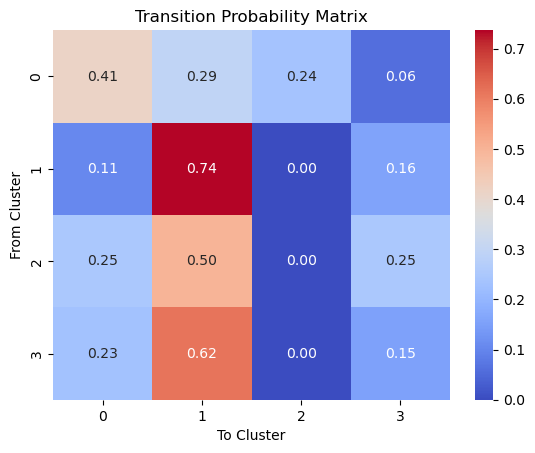

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(transition_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title('Transition Probability Matrix')
plt.xlabel('To Cluster')
plt.ylabel('From Cluster')
plt.show()


Number of entries for each cluster based on the highest probability:
Highest_Prob_Cluster
0    18
1    57
2     4
3    13
Name: count, dtype: int64


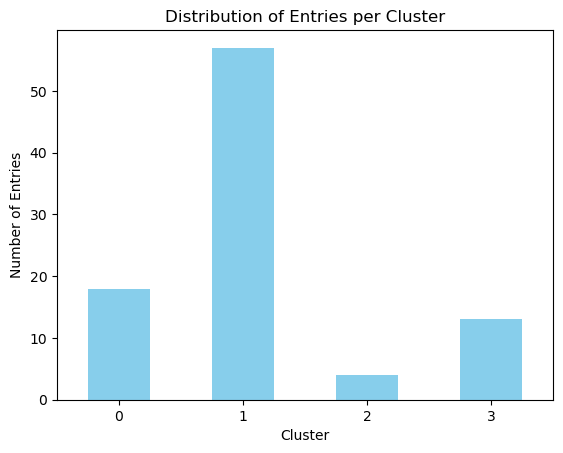

In [13]:
import pandas as pd

# Load the DataFrame assuming it's already read from a CSV and includes probability columns
# Example DataFrame structure:
# df = pd.read_csv('path_to_your_cluster_probability_csv.csv')

# Extract only the probability columns for each cluster
prob_columns = [col for col in df.columns if 'Prob_Cluster_' in col]

# Determine the most probable cluster for each entry
df['Highest_Prob_Cluster'] = df[prob_columns].idxmax(axis=1)

# Extract cluster index from column names
df['Highest_Prob_Cluster'] = df['Highest_Prob_Cluster'].apply(lambda x: int(x.split('_')[-1]))

# Count the number of entries for each cluster based on the highest probability
cluster_counts = df['Highest_Prob_Cluster'].value_counts().sort_index()

print("Number of entries for each cluster based on the highest probability:")
print(cluster_counts)

# Optionally, visualize the distribution
import matplotlib.pyplot as plt

cluster_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Cluster')
plt.ylabel('Number of Entries')
plt.title('Distribution of Entries per Cluster')
plt.xticks(rotation=0)
plt.show()


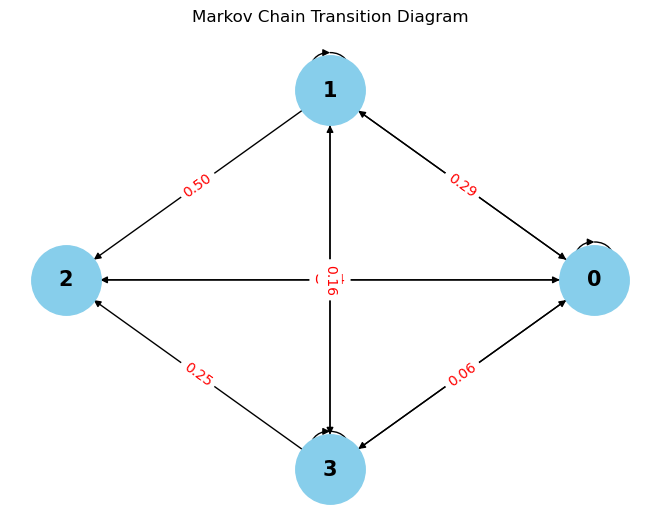

In [14]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd

# Assuming transition_matrix is your DataFrame with transition probabilities
# Example loading:
# transition_matrix = pd.DataFrame({
#     0: [0.411765, 0.105263, 0.250000, 0.230769],
#     1: [0.294118, 0.736842, 0.500000, 0.615385],
#     2: [0.235294, 0.000000, 0.000000, 0.000000],
#     3: [0.058824, 0.157895, 0.250000, 0.153846]
# }, index=[0, 1, 2, 3])

G = nx.DiGraph()

# Add nodes and edges to the graph
for start in transition_matrix.columns:
    for end in transition_matrix.index:
        probability = transition_matrix.loc[end, start]
        if probability > 0:  # Only add an edge if there's a non-zero probability
            G.add_edge(start, end, weight=probability, label=f"{probability:.2f}")

pos = nx.circular_layout(G)  # positions for all nodes
edges = G.edges(data=True)

nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=2500, edge_color='k', width=1, linewidths=1,
        font_size=15, font_color="black", font_weight="bold")
nx.draw_networkx_edge_labels(G, pos, edge_labels={(u, v): d['label'] for u, v, d in edges}, font_color='red')
plt.title('Markov Chain Transition Diagram')
plt.show()


In [4]:
anoter_df = pd.read_csv('classification_data_set_post_1979.csv')

In [5]:
anoter_df.columns

Index(['DATE', 'PPI_pct_change', 'Real_GDP_pct_change',
       'Industrial_production_pct_change', 'Consumer_sentiment_diff',
       'Unemployment_rate_diff', 'CPI_log'],
      dtype='object')

In [6]:
anoter_df['DATE']


0     1979-01-31
1     1979-07-31
2     1980-01-31
3     1980-07-31
4     1981-01-31
         ...    
87    2022-07-31
88    2023-01-31
89    2023-07-31
90    2024-01-31
91    2024-07-31
Name: DATE, Length: 92, dtype: object

In [7]:
anoter_df
anoter_df['DATE'] = pd.to_datetime(anoter_df['DATE'])
anoter_df.set_index('DATE', inplace=True)

In [8]:
summary_stats = anoter_df.describe()

In [9]:
summary_stats

,PPI_pct_change,Real_GDP_pct_change,Industrial_production_pct_change,Consumer_sentiment_diff,Unemployment_rate_diff,CPI_log
count,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000
mean,0.240192,0.214127,0.135889,-0.029638,-0.003442,-1.242819
std,0.663868,0.196459,0.428933,1.479268,0.164334,0.594249
min,-2.977121,-0.553983,-1.930430,-4.550000,-0.633333,-3.549738
25%,-0.046906,0.116402,-0.026940,-0.883333,-0.066667,-1.590097
50%,0.233711,0.219855,0.195513,-0.041667,-0.033333,-1.258574
75%,0.522814,0.323614,0.398659,1.070833,0.033333,-0.936734
max,2.140894,0.712412,1.056459,3.733333,1.100000,0.127294


In [10]:
summary_stats_rounded = summary_stats.round(4).T

In [11]:
summary_stats_rounded

,count,mean,std,min,25%,50%,75%,max
PPI_pct_change,92.0,0.2402,0.6639,-2.9771,-0.0469,0.2337,0.5228,2.1409
Real_GDP_pct_change,92.0,0.2141,0.1965,-0.5540,0.1164,0.2199,0.3236,0.7124
Industrial_production_pct_change,92.0,0.1359,0.4289,-1.9304,-0.0269,0.1955,0.3987,1.0565
Consumer_sentiment_diff,92.0,-0.0296,1.4793,-4.5500,-0.8833,-0.0417,1.0708,3.7333
Unemployment_rate_diff,92.0,-0.0034,0.1643,-0.6333,-0.0667,-0.0333,0.0333,1.1000
CPI_log,92.0,-1.2428,0.5942,-3.5497,-1.5901,-1.2586,-0.9367,0.1273


In [12]:
latex_table = summary_stats_rounded.to_latex()


In [ ]:
latex_table

'\\begin{tabular}{lrrrrrrrr}\n\\toprule\n & count & mean & std & min & 25% & 50% & 75% & max \\\\\n\\midrule\nPPI_pct_change & 92.000000 & 0.240200 & 0.663900 & -2.977100 & -0.046900 & 0.233700 & 0.522800 & 2.140900 \\\\\nReal_GDP_pct_change & 92.000000 & 0.214100 & 0.196500 & -0.554000 & 0.116400 & 0.219900 & 0.323600 & 0.712400 \\\\\nIndustrial_production_pct_change & 92.000000 & 0.135900 & 0.428900 & -1.930400 & -0.026900 & 0.195500 & 0.398700 & 1.056500 \\\\\nConsumer_sentiment_diff & 92.000000 & -0.029600 & 1.479300 & -4.550000 & -0.883300 & -0.041700 & 1.070800 & 3.733300 \\\\\nUnemployment_rate_diff & 92.000000 & -0.003400 & 0.164300 & -0.633300 & -0.066700 & -0.033300 & 0.033300 & 1.100000 \\\\\nCPI_log & 92.000000 & -1.242800 & 0.594200 & -3.549700 & -1.590100 & -1.258600 & -0.936700 & 0.127300 \\\\\n\\bottomrule\n\\end{tabular}\n'